# Understanding The Ubuntu Dialogue Corpus Data

In [2]:
!pip install polars
import polars as pl

In [3]:
data = pl.read_csv('./dialogueText.csv')

In [4]:
data.to_pandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038324 entries, 0 to 1038323
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   folder      1038324 non-null  int64 
 1   dialogueID  1038324 non-null  object
 2   date        1038324 non-null  object
 3   from        1038324 non-null  object
 4   to          566045 non-null   object
 5   text        1038324 non-null  object
dtypes: int64(1), object(5)
memory usage: 47.5+ MB


In [5]:
data['text'][0], data['text'][1]

("Hello folks, please help me a bit with the following sentence: 'Order here your personal photos or videos.' - I think the only allowed version is 'Order your personal videos or photos here.', but I'm not sure, are you?",
 'Did I choose a bad channel? I ask because you seem to be dumb like windows user')

In [6]:
data['text'][2]

'the second sentence is better english   and we are not dumb'

In [7]:
data

folder,dialogueID,date,from,to,text
i64,str,str,str,str,str
3,"""126125.tsv""","""2008-04-23T14:...","""bad_image""",null,"""Hello folks, p..."
3,"""126125.tsv""","""2008-04-23T14:...","""bad_image""",null,"""Did I choose a..."
3,"""126125.tsv""","""2008-04-23T14:...","""lordleemo""","""bad_image""","""the second sen..."
3,"""64545.tsv""","""2009-08-01T06:...","""mechtech""",null,"""Sock Puppe?t"""
3,"""64545.tsv""","""2009-08-01T06:...","""mechtech""",null,"""WTF?"""
3,"""64545.tsv""","""2009-08-01T06:...","""richardcavell""","""mechtech""","""it's a wikiped..."
3,"""98758.tsv""","""2009-05-20T07:...","""C-00000100""","""Severity1""","""what is bartek..."
3,"""98758.tsv""","""2009-05-20T08:...","""C-00000100""","""Severity1""","""is he trying t..."
3,"""98758.tsv""","""2009-05-20T08:...","""C-00000100""","""Severity1""","""bartek go here..."


# Understanding the Data

Seems Like Entry with some `dialogueID` with no `To` value are questions asked by `from` guy and in the same `dialogueID` and Entry with `to` values are reply from `from` guy

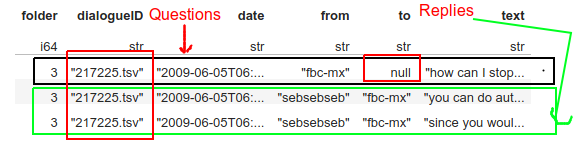

* Entries with same `dialogueID` are one  single post
* Entries with no `to` values are Questions
* Entries with any values in `to` are answers by `from`

In [9]:
all_cols = data.columns

In [29]:
# THIS CODE SAMPLES ONE `dialogueID` AND CREATES MASK
def print_some_posts(p:int = 3, show_df = False):
    for i in range(1, p+1):
        print(f'\nPost {i} {"---"*20}\n')
        mask = (data['dialogueID'] == data['dialogueID'].sample()[0])
        post = data.filter(mask)
        
        last_talker = None
        
        for j in post.iterrows():
            _, dialogueid, date , fromuser, touser, text = j
            
            if touser == None:
                if last_talker == fromuser:
                    print(f'               {text}')
                else:
                    print(f'{fromuser}  :  {text}')
            else:
                if last_talker == fromuser:
                    print(f'                   {text}')
                else:
                    print(f'     {fromuser}  :  {text}')
                    
            last_talker = fromuser
        
        
        if show_df:
            print(post)
            
        
        

In [30]:
print_some_posts(10 ,show_df = False)


Post 1 ------------------------------------------------------------

some  :  how to install Midnight Commander in ubuntu?
               E: Couldn't find package mc
     tsimpson  :  make sure you enable the universe repository

Post 2 ------------------------------------------------------------

     SkippersBoss  :  which version are you trying to install on what type of machine
                   onwhat machine. cpu,memory/graphics
                   There are many reasons why live CD stops running.

Post 3 ------------------------------------------------------------

[Lowkey]  :  Can someone help me?
               :)
     Frogzoo  :  we don't know

Post 4 ------------------------------------------------------------

terminhell  :  ello ello
               just use irssi :p
     monkeybox  :  +1

Post 5 ------------------------------------------------------------

frogzoo  :  there's christian & satanic ubuntus
               no suicide bomber ubuntu as yet
     tertitten  :  ser